To calculate the **total adjusted return** (which accounts for price appreciation plus reinvested dividends and stock splits), the standard approach in Python is to use the `yfinance` library. It provides an **`Adj Close`** column that handles these calculations automatically.

Here is the code to pull this data and calculate the returns.

### Prerequisites

You will need to install `yfinance` if you haven't already:

```bash
pip install yfinance pandas
```

### Python Code

This script calculates the total percentage return over a specific timeframe (e.g., the last 5 years) and prints the result.

In [10]:
# Run this in a cell to force the update in the current kernel
%pip install --upgrade yfinance -q

Note: you may need to restart the kernel to use updated packages.


In [7]:
import yfinance as yf
import pandas as pd
from datetime import datetime, timedelta

# 1. Define settings
tickers = ['VTI', 'VXUS']

# Set start date (e.g., 5 years ago).
# To use the max history available, you can set start="1900-01-01"
start_date = (datetime.now() - timedelta(days=5*365)).strftime('%Y-%m-%d')
end_date = datetime.now().strftime('%Y-%m-%d')

print(f"Fetching data from {start_date} to {end_date}...\n")

# 2. Download data
# We explicitly set auto_adjust=True to silence the FutureWarning and ensure
# we get the price adjusted for dividends and splits.
data = yf.download(tickers, start=start_date, end=end_date, progress=False, auto_adjust=True)['Close']

# 3. Calculate Total Return
# Formula: (Final Price / Initial Price) - 1
total_returns = (data.iloc[-1] / data.iloc[0]) - 1

# 4. Format and Print Results
print("Total Adjusted Return:")
print("-" * 30)
for ticker in tickers:
    initial_price = data[ticker].iloc[0]
    final_price = data[ticker].iloc[-1]
    pct_return = total_returns[ticker] * 100

    print(f"{ticker}: {pct_return:.2f}%")
    print(f"   (Price grew from ${initial_price:.2f} to ${final_price:.2f})")
    print("-" * 30)

Fetching data from 2020-11-24 to 2025-11-23...

Total Adjusted Return:
------------------------------
VTI: 85.45%
   (Price grew from $174.61 to $323.80)
------------------------------
VXUS: 45.39%
   (Price grew from $50.15 to $72.92)
------------------------------


In [8]:
# Change this line:
# data = yf.download(tickers, start=start_date, end=end_date, progress=False, auto_adjust=True)['Close']

# To this (enable progress to see errors):
data = yf.download(tickers, start=start_date, end=end_date, progress=True, auto_adjust=True)['Close']

[*********************100%***********************]  2 of 2 completed


-----

### Advanced: Visualizing "Growth of $10,000"

If you want to see *how* the return accumulated over time (a common chart in finance), use this snippet. It normalizes both assets to start at the same value.

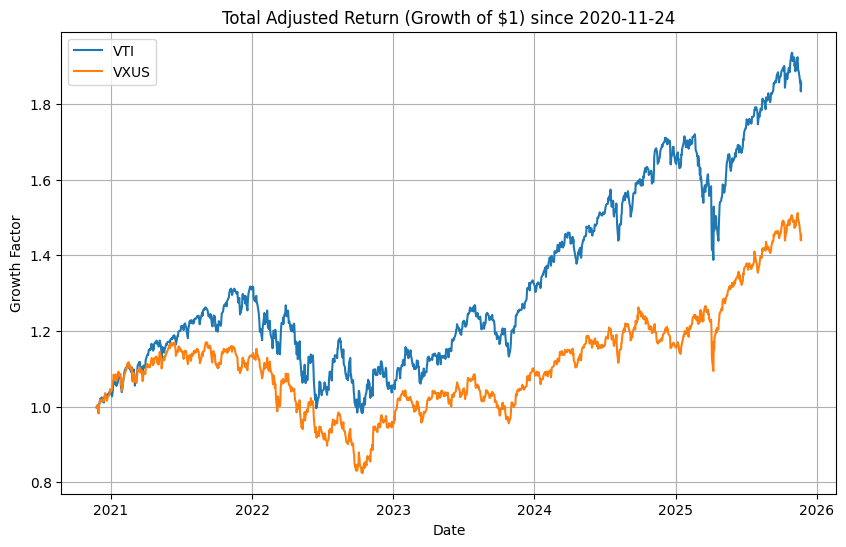

In [9]:
import matplotlib.pyplot as plt

# Calculate cumulative returns (Growth of $1)
cumulative_returns = (1 + data.pct_change()).cumprod()

# Plot
plt.figure(figsize=(10, 6))
for ticker in tickers:
    plt.plot(cumulative_returns.index, cumulative_returns[ticker], label=ticker)

plt.title(f'Total Adjusted Return (Growth of $1) since {start_date}')
plt.xlabel('Date')
plt.ylabel('Growth Factor')
plt.legend()
plt.grid(True)
plt.show()

### Why use `Adj Close`?

When you look at a stock chart on Google, it often shows only the **Price Return**.

  * **Price Return:** Only accounts for the stock price going up.
  * **Adjusted Close:** Accounts for the stock price going up **+** dividends being paid out and reinvested back into the fund.
  * **Why it matters:** For dividend-paying funds like VTI (approx 1.3% yield) and VXUS (approx 3% yield), `Adj Close` is the only accurate way to measure your actual profit over the long term.

**Would you like me to update this code to calculate the return of a specific portfolio mix (e.g., 80% VTI / 20% VXUS)?**

This Stack Overflow thread addresses an issue where users are unable to retrieve the "Adj Close" (Adjusted Close) column when using the `yfinance` library.

**The Problem:**
The user reported that `yfinance` was returning columns for Open, High, Low, Close, Volume, Dividends, and Stock Splits, but the "Adj Close" column was missing. Downgrading to an older version (0.2.30) did not resolve the issue.

**The Solutions:**
* **Set `auto_adjust=False`:** The most highly rated solution suggests that you must explicitly set the `auto_adjust` parameter to `False` when downloading data.
    * *Code Example:* `data = yf.download(tickers, auto_adjust=False)`
* **Use `yf.download()` instead of `Ticker.history()`:** The original poster found that their issue was resolved by switching their method of retrieval. They were originally using `yf.Ticker("TSLA").history(...)` but found that `yf.download('TSLA', ...)` successfully returned the Adjusted Close data.
* **Note on Version:** Some users noted that `yfinance` version 0.2.50 should provide the column by default when using `yf.download()`.